In [124]:
# %load processJSONData.py
# historyStorage_1477123900862362.json

import json
import seaborn as sns
with open('historyStorage_1477123900862362.json') as data_file:    
    searches = json.loads(data_file.read())

for search in searches:
    url = search['url']
    lastVisitTime = search['lastVisitTime']
    title = search['title']
    typedCount = search['typedCount']
    visitCount = search['visitCount']


In [125]:
dimension = len(searches)
url = []
lastVisitTime = []
title = []
typedCount = []
visitCount = []

for i in range(dimension):
    url.append(str(searches[i]['url']))
    lastVisitTime.append(searches[i]['lastVisitTime'])
    title.append(searches[i]['title'])
    typedCount.append(searches[i]['typedCount'])
    visitCount.append(searches[i]['visitCount'])
len(url)
len(title)
len(typedCount)
len(visitCount)
len(lastVisitTime)

251

251

251

251

251

In [126]:
import re
def getDomain(url):
    #requires 'http://' or 'https://'
    #pat = r'(https?):\/\/(\w+\.)*(?P<domain>\w+)\.(\w+)(\/.*)?'
    #'http://' or 'https://' is optional
    pat = r'((https?):\/\/)?(\w+\.)*(?P<domain>\w+)\.(\w+)(\/.*)?'
    m = re.match(pat, url)
    if m:
        domain = m.group('domain')
        return domain

In [127]:
domains = []
for i in url:
    domains.append(getDomain(i))

In [128]:
len(domains)
len(typedCount)
lastVisitTime
# time.time()

251

251

[1477123858904.275,
 1477123637551.594,
 1477123634378.3318,
 1477123628217.586,
 1477123525464.9602,
 1477123522514.701,
 1477123268227.45,
 1477123265092.448,
 1477123262209.562,
 1477123241691.165,
 1477123088261.2979,
 1477123075706.24,
 1477122977389.872,
 1477122862546.8572,
 1477122851642.596,
 1477122740566.936,
 1477122739143.032,
 1477122198518.4,
 1477122049595.711,
 1477121358229.251,
 1477121356423.6528,
 1477120112362.674,
 1477120107494.5322,
 1477120010349.931,
 1477120002485.1438,
 1477119995770.729,
 1477119871162.512,
 1477119172708.888,
 1477119149914.557,
 1477119032650.179,
 1477118789372.0579,
 1477118773761.76,
 1477118766398.885,
 1477118639536.225,
 1477118377629.963,
 1477118185681.5132,
 1477117937529.145,
 1477117863736.9639,
 1477117564531.386,
 1477117385545.4011,
 1477117130495.381,
 1477117006311.128,
 1477116992489.0698,
 1477116987691.628,
 1477116976769.837,
 1477116970885.278,
 1477116966133.004,
 1477116931679.93,
 1477116896951.065,
 1477116876285

In [129]:
import time
visitTimes = []
for i in lastVisitTime:
    visitTimes.append(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(i/1000)))

In [130]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data = {'domains': domains, 
                     'visitTimes': visitTimes,
                     'title': title, 
                     'typedCount': typedCount, 
                     'visitCount': visitCount})

# df.lastVisitTime = (df.lastVisitTime - np.mean(df.lastVisitTime))/ np.std(df.lastVisitTime)


In [131]:
df = df.reindex(index=df.index[::-1], copy=True)
df.index = range(dimension)
df

,domains,title,typedCount,visitCount,visitTimes
0,imgur,Imgur: The most awesome images on the Internet,2,437,2016-10-22 00:12:10
1,google,,0,1,2016-10-22 01:07:39
2,google,google pun - Google Search,0,1,2016-10-22 01:07:49
3,cheezburger,Puns - google - Visual Puns and Jokes - So Muc...,0,1,2016-10-22 01:07:53
4,smashthestack,,0,1,2016-10-22 01:10:05
5,google,Google,0,3,2016-10-22 01:10:36
6,google,Untitled spreadsheet - Google Sheets,0,1,2016-10-22 01:14:19
7,google,Hackathon Timeline - Google Sheets,0,1,2016-10-22 01:15:29
8,google,,0,2,2016-10-22 01:15:30
9,google,Hackathon Timeline - Google Sheets,0,76,2016-10-22 01:15:38


In [132]:
df_counts = df.groupby(df.domains).count()
df_counts

,title,typedCount,visitCount,visitTimes
domains,,,,
98,2,2,2,2
amazon,1,1,1,1
apple,3,3,3,3
askubuntu,2,2,2,2
cheezburger,1,1,1,1
chrome,6,6,6,6
codersbraggingrights,1,1,1,1
currentmillis,1,1,1,1
digitalocean,3,3,3,3


In [133]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

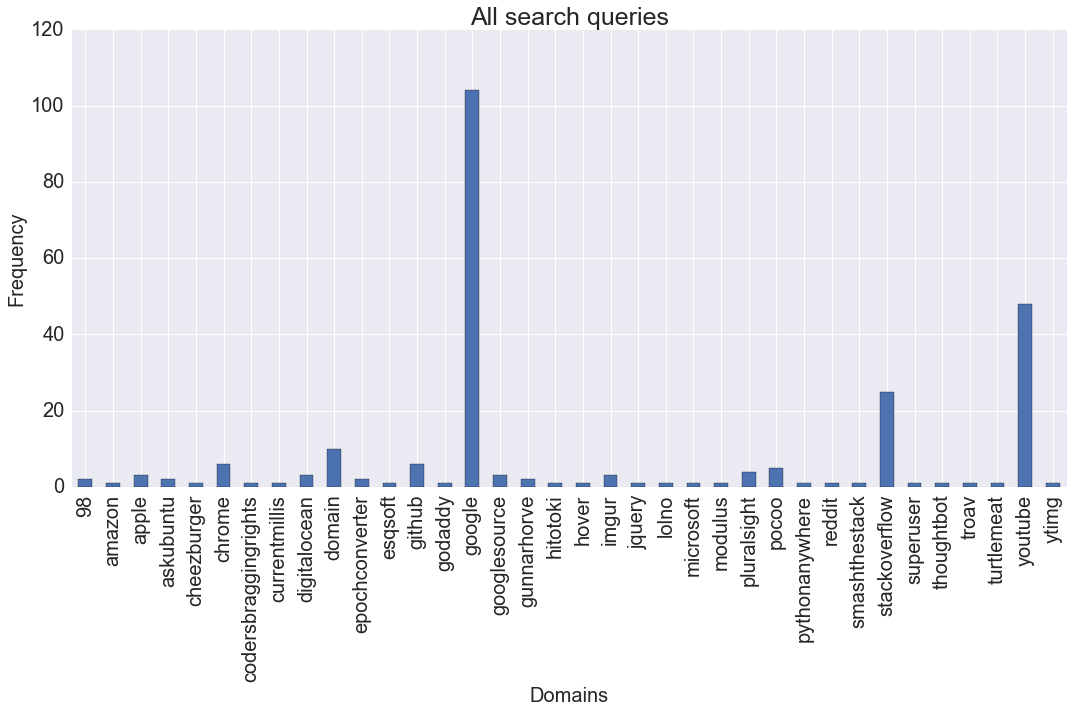

In [282]:
plt.figure(figsize=[15,10])
domain_hist = df_counts.title.plot(kind="bar", fontsize=20)
plt.ylabel('Frequency', fontsize = 20); plt.xlabel('Domains', fontsize=20)
plt.title('All search queries', fontsize = 25)
plt.tight_layout()
plt.savefig('domain_frequencies.png', bbox_inches='tight')

In [246]:
stackoverflow_query = df[df.domains == 'stackoverflow']
google_query = df[df.domains == 'google']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 0.2)
# min_df = 0.2 means that the term must be in at least 20% of the documents
X = vectorizer.fit_transform(stackoverflow_query.title)

from sklearn.cluster import KMeans
k = 4 # Define the number of clusters in which we want to partion our data
# Define the proper notion of distance to deal with documents
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
# Run the algorithm kmeans
model = KMeans(n_clusters = k)
model.fit(X);

no_words = 2 # Number of words to print per cluster
order_centroids = model.cluster_centers_.argsort()[:, ::-1] # Sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()
labels = model.labels_ # Get labels assigned to each data

print("Top stack overflow terms per cluster:\n")
for i in range(k):
    
    print("Cluster %d topics:" % i)
    for title in stackoverflow_query["title"][labels == i]:
        print(' %s,' % title)
    print #add a whitespace

    print("Cluster %d words:" % i,) 
    for ind in order_centroids[i, :no_words]:
        print (' %s' % terms[ind],),
    print
    print

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Top stack overflow terms per cluster:

Cluster 0 topics:
 javascript - How to pass json POST data to Web API method as object - Stack Overflow,
 http - JavaScript post request like a form submit - Stack Overflow,
 javascript - POST data in JSON format - Stack Overflow,
 http - Python: BaseHTTPRequestHandler post variables - Stack Overflow,
 python - Trying to parse `request.body` from POST in Django - Stack Overflow,

('Cluster 0 words:',)
(u' post',) (u' javascript',)

Cluster 1 topics:
 python - how to remove django from ubuntu? - Stack Overflow,
 how to display a web page with python? - Stack Overflow,
 How do I write JSON data to a file in Python? - Stack Overflow,
 python - How to make a class JSON serializable - Stack Overflow,
 parsing json array in python - Stack Overflow,
 Python JSON decoding - Stack Overflow,
 Convert string to JSON using Python - Stack Overflow,

('Cluster 1 words:',)
(u' python',) (u' json',)

Cluster 2 topics:
 Is it possible to get mac address by Chrome 

In [225]:
lastVisitTime.reverse()
fixed_int_times = []
for i in lastVisitTime:
    fixed_int_times.append((i - np.mean(lastVisitTime))/np.std(lastVisitTime))

In [264]:
google_search = df[df.domains == 'google']
google_search_times = []
for i in google_search.index:
     google_search_times.append(fixed_int_times[i])
        
df_all_times = []
for i in df.index:
     df_all_times.append(fixed_int_times[i])
        
stackoverflow_search = df[df.domains == 'stackoverflow']
stackoverflow_search_times = []
for i in stackoverflow_search.index:
    stackoverflow_search_times.append(fixed_int_times[i])
    
both_search = df[(df.domains == 'stackoverflow') | (df.domains == 'google')]
both_search_times = []
for i in both_search.index:
    both_search_times.append(fixed_int_times[i])

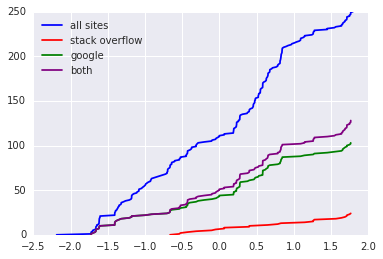

In [283]:
plt.plot(df_all_times,range(len(df_all_times)), c = 'blue', label= 'all sites')
plt.plot(stackoverflow_search_times,range(len(stackoverflow_search_times)), c = 'red', label = 'stack overflow')
plt.plot(google_search_times,range(len(google_search_times)), c = 'green', label = 'google')
plt.plot(both_search_times,range(len(both_search_times)), c = 'purple', label = 'both')

plt.legend(loc = 'upper left')
# plt.savefig('cumulative_densities.png', bbox_inches='tight')

In [281]:
def CBR_ratio(total_searches, google_searches, stackoverflow_searches):
    google_ratio = len(google_searches) / (len(total_searches) + 0.0)
    stackoverflow_ratio = len(stackoverflow_searches) / (len(total_searches) + 0.0)
    
    return google_ratio, stackoverflow_ratio

CBR_ratio(df_all_times, google_search_times, stackoverflow_search_times)

(0.41434262948207173, 0.099601593625498)